In [ ]:
!sudo pip install python-igraph

In [ ]:
from collections import defaultdict #For Automatic Dictionary Initialization

import networkx as nx #Network Analysis Module
import igraph #Network Analysis Module

import pandas as pd #Data I/O
import numpy as np #Data Preprocessing

from IPython.display import display #Data Output

import seaborn as sns #Visulization Library
import matplotlib.pyplot as plt #Visulization Library

In [ ]:
def compute_ratio(G):                   #Computes N_G/N
  len_connected_components = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
  len_giant_connected_component=len_connected_components[0]
  ratio=len_giant_connected_component/len(G.nodes())
  return ratio

def float_range(list,start, stop, step): #Computes float list of numbers 
  while start < stop:
    list.append(float(start))
    start += step

def global_clustering(G):                 #Computes Global Clustering Coefficient which is equivalent to transitivity in networkx module
  gcc=nx.algorithms.cluster.transitivity(G)
  return gcc

In [ ]:
fh = open("/content/twitter.tsv", "rb")
G = nx.read_edgelist(fh,create_using=nx.DiGraph())
fh.close()
print(len(G.nodes()))
print(len(G.edges()))

23370
33101


In [ ]:
df=nx.degree_centrality(G)

df = [v for v in df.values()]
df=pd.DataFrame(df)
df.reset_index(inplace=True)
df.columns=['Node','degree_centrality']

df=df.sort_values(by='degree_centrality',ascending=False)
df.reset_index(inplace=True)
df=df.drop('index',axis=1)

display(df[:10])

df.to_csv('degree_twitter.csv')

,Node,degree_centrality
0,11823,0.010227
1,7745,0.009628
2,379,0.009500
3,2597,0.009200
4,14112,0.008130
5,14612,0.007916
6,2676,0.007745
7,21477,0.007703
8,4316,0.007232
9,4480,0.007103


In [ ]:
df=nx.eigenvector_centrality(G)

df = [v for v in df.values()]
df=pd.DataFrame(df)
df.reset_index(inplace=True)
df.columns=['Node','eigenvector_centrality']

df=df.sort_values(by='eigenvector_centrality',ascending=False)
df.reset_index(inplace=True)
df=df.drop('index',axis=1)

display(df[:10])

df.to_csv('eigenvector__twitter.csv')

,Node,eigenvector_centrality
0,801,0.195066
1,861,0.190604
2,804,0.165639
3,791,0.161847
4,809,0.158767
5,842,0.157618
6,794,0.150092
7,824,0.148985
8,815,0.148854
9,818,0.143007


In [ ]:
df=nx.closeness_centrality(G)

df = [v for v in df.values()]
df=pd.DataFrame(df)
df.reset_index(inplace=True)
df.columns=['Node','closeness_centrality']

df=df.sort_values(by='closeness_centrality',ascending=False)
df.reset_index(inplace=True)
df=df.drop('index',axis=1)

display(df[:10])

df.to_csv('closeness_twitter.csv')

,Node,closeness_centrality
0,1898,0.002782
1,620,0.002603
2,668,0.002591
3,35,0.002568
4,12289,0.002343
5,896,0.002308
6,36,0.002290
7,5563,0.002243
8,34,0.002126
9,13545,0.002109


In [ ]:
df=nx.algorithms.link_analysis.pagerank_alg.pagerank(G)

df = [v for v in df.values()]
df=pd.DataFrame(df)
df.reset_index(inplace=True)
df.columns=['Node','pagerank_centrality']

df=df.sort_values(by='pagerank_centrality',ascending=False)
df.reset_index(inplace=True)
df=df.drop('index',axis=1)

display(df[:10])

df.to_csv('pagerank_twitter.csv')

,Node,pagerank_centrality
0,35,0.000189
1,34,0.000169
2,23,0.000167
3,36,0.000150
4,7724,0.000102
5,1306,0.000098
6,536,0.000097
7,3677,0.000094
8,1325,0.000094
9,801,0.000093


In [ ]:
df=nx.algorithms.cluster.clustering(G)

df = [v for v in df.values()]
df=pd.DataFrame(df)
df.reset_index(inplace=True)
df.columns=['Node','LCC']

df=df.sort_values(by='LCC',ascending=False)
df.reset_index(inplace=True)
df=df.drop('index',axis=1)

display(df[:10])

df.to_csv('LCC_twitter.csv')

,Node,LCC
0,13854,1.0
1,11788,1.0
2,20697,1.0
3,20696,1.0
4,2776,1.0
5,2775,1.0
6,20693,1.0
7,20692,1.0
8,20691,1.0
9,2767,1.0


In [ ]:
nx.average_clustering(G,count_zeros=True)

0.05087457375195453

In [ ]:
global_clustering(G)

0.005629759274224368

In [ ]:
nx.algorithms.reciprocity(G)

0.016313706534545783

In [ ]:
avg_k_vals=list([]) 
float_range(avg_k_vals,0, 5, 0.1)
avg_k_vals=[ float('%.1f' % elem) for elem in avg_k_vals ]

In [ ]:
dicto=defaultdict(lambda:0)

for avg_k in avg_k_vals:
  if avg_k==0: #For <k>= 0 no edges
    dicto[avg_k]=0
    continue

  nodes=len(G.nodes())
  edges=int(nodes*avg_k)//2 #Each edge is counted twice in k calculation

  G_aux=igraph.Graph.Erdos_Renyi(n=nodes, m=edges) #Create a random G(n,m) Graph

  lister=G_aux.get_edgelist() #Get the random G(n,m) Graph's edgelist

  G_aux = nx.from_edgelist(lister) #Convert the random G(n,m) Graph's edgelist to networkx compatible graph
  
  dicto[avg_k]=compute_ratio(G_aux) #Compute N_G/N ratio

In [ ]:
print(dicto)

defaultdict(<function <lambda> at 0x7fa5c7cb2dd0>, {0.0: 0, 0.1: 0.0022471910112359553, 0.2: 0.0016420361247947454, 0.3: 0.0014773473407747866, 0.4: 0.002344971339239187, 0.5: 0.002065666449228093, 0.6: 0.0026412602584661824, 0.7: 0.004753416518122401, 0.8: 0.005783509183274717, 0.9: 0.01205950317735413, 1.0: 0.06072080600446278, 1.1: 0.2499199385127778, 1.2: 0.46280027032008353, 1.3: 0.5999647597791613, 1.4: 0.6666666666666666, 1.5: 0.7539603411986263, 1.6: 0.8026266416510319, 1.7: 0.8355914538822303, 1.8: 0.8746725563716677, 1.9: 0.8973894673306172, 2.0: 0.9171017633730667, 2.1: 0.9351217378626622, 2.2: 0.9505126847349925, 2.3: 0.9561662070932776, 2.4: 0.9656270487964784, 2.5: 0.9687936655798789, 2.6: 0.9760188522317715, 2.7: 0.9821395775941231, 2.8: 0.9852539595849262, 2.9: 0.9872550798258345, 3.0: 0.9888554352222172, 3.1: 0.9907208176438945, 3.2: 0.9925559418739414, 3.3: 0.9946286678208373, 3.4: 0.9952178533475027, 3.5: 0.9957236697085924, 3.6: 0.9971424803270761, 3.7: 0.9971060247

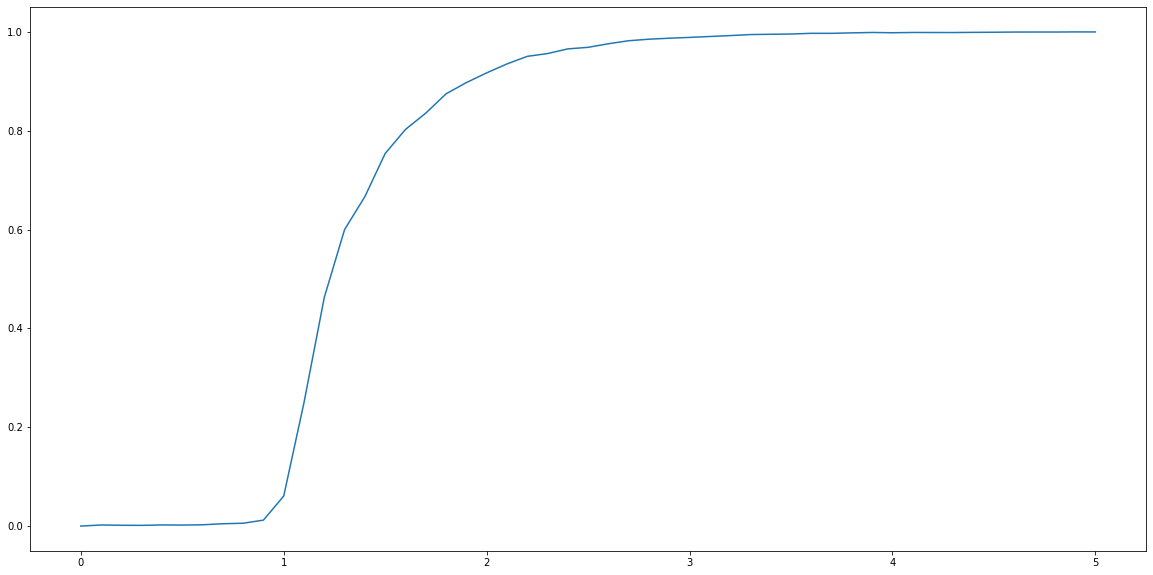

In [ ]:
plt.figure(figsize=(20,10))

sns.lineplot(x=dicto.keys(),y=dicto.values())

In [ ]:
fh = open("/content/email-Eu-core_f.txt", "rb")
G = nx.read_edgelist(fh,create_using=nx.DiGraph())
fh.close()
print(len(G.nodes()))
print(len(G.edges()))

1005
25571


In [ ]:
df=nx.degree_centrality(G)

df = [v for v in df.values()]
df=pd.DataFrame(df)
df.reset_index(inplace=True)
df.columns=['Node','degree_centrality']

df=df.sort_values(by='degree_centrality',ascending=False)
df.reset_index(inplace=True)
df=df.drop('index',axis=1)

display(df[:10])

df.to_csv('degree_email.csv')

,Node,degree_centrality
0,160,0.543825
1,121,0.377490
2,107,0.371514
3,62,0.367530
4,86,0.354582
5,82,0.346614
6,434,0.306773
7,183,0.300797
8,5,0.278884
9,129,0.273904


In [ ]:
df=nx.eigenvector_centrality(G)

df = [v for v in df.values()]
df=pd.DataFrame(df)
df.reset_index(inplace=True)
df.columns=['Node','eigenvector_centrality']

df=df.sort_values(by='eigenvector_centrality',ascending=False)
df.reset_index(inplace=True)
df=df.drop('index',axis=1)

display(df[:10])

df.to_csv('eigenvector_email.csv')

,Node,eigenvector_centrality
0,160,0.149208
1,107,0.143655
2,62,0.140084
3,434,0.136061
4,121,0.136024
5,183,0.126031
6,128,0.120267
7,256,0.116851
8,249,0.115490
9,129,0.115410


In [ ]:
df=nx.closeness_centrality(G)

df = [v for v in df.values()]
df=pd.DataFrame(df)
df.reset_index(inplace=True)
df.columns=['Node','closeness_centrality']

df=df.sort_values(by='closeness_centrality',ascending=False)
df.reset_index(inplace=True)
df=df.drop('index',axis=1)

display(df[:10])

df.to_csv('closeness_email.csv')

,Node,closeness_centrality
0,160,0.449669
1,62,0.436796
2,107,0.433133
3,434,0.428434
4,121,0.427615
5,86,0.423034
6,64,0.421441
7,129,0.419073
8,183,0.418551
9,128,0.417250


In [ ]:
df=nx.algorithms.link_analysis.pagerank_alg.pagerank(G)

df = [v for v in df.values()]
df=pd.DataFrame(df)
df.reset_index(inplace=True)
df.columns=['Node','pagerank_centrality']

df=df.sort_values(by='pagerank_centrality',ascending=False)
df.reset_index(inplace=True)
df=df.drop('index',axis=1)

display(df[:10])

df.to_csv('pagerank_email.csv')

,Node,pagerank_centrality
0,1,0.009412
1,130,0.006914
2,160,0.006759
3,62,0.005322
4,86,0.005130
5,107,0.005004
6,365,0.004787
7,121,0.004721
8,5,0.004525
9,129,0.004453


In [ ]:
df=nx.algorithms.cluster.clustering(G)

df = [v for v in df.values()]
df=pd.DataFrame(df)
df.reset_index(inplace=True)
df.columns=['Node','LCC']

df=df.sort_values(by='LCC',ascending=False)
df.reset_index(inplace=True)
df=df.drop('index',axis=1)

display(df[:10])

df.to_csv('LCC_email.csv')

,Node,LCC
0,709,1.0
1,398,1.0
2,874,1.0
3,637,1.0
4,632,1.0
5,631,1.0
6,630,1.0
7,625,1.0
8,873,1.0
9,766,1.0


In [ ]:
nx.average_clustering(G,count_zeros=True)

0.3656613629131559

In [ ]:
global_clustering(G)

0.2201493109315837

In [ ]:
nx.algorithms.reciprocity(G)

0.6933635759258535

In [ ]:
avg_k_vals=list([])
float_range(avg_k_vals,0, 5, 0.1)
avg_k_vals=[ float('%.1f' % elem) for elem in avg_k_vals ]

In [ ]:
dicto=defaultdict(lambda:0)

for avg_k in avg_k_vals:
  if avg_k==0:
    dicto[avg_k]=0
    continue

  nodes=len(G.nodes())
  edges=int(nodes*avg_k)//2
  G_aux=igraph.Graph.Erdos_Renyi(n=nodes, m=edges)
  lister=G_aux.get_edgelist()
  G_aux = nx.from_edgelist(lister)

  dicto[avg_k]=compute_ratio(G_aux)

In [ ]:
print(dicto)

defaultdict(<function <lambda> at 0x7fa5c7d49dd0>, {0.0: 0, 0.1: 0.0425531914893617, 0.2: 0.026881720430107527, 0.3: 0.019762845849802372, 0.4: 0.030959752321981424, 0.5: 0.019559902200488997, 0.6: 0.021834061135371178, 0.7: 0.042682926829268296, 0.8: 0.039711191335740074, 0.9: 0.11872909698996656, 1.0: 0.12848297213622292, 1.1: 0.27844311377245506, 1.2: 0.44803370786516855, 1.3: 0.502724795640327, 1.4: 0.7064220183486238, 1.5: 0.7797927461139896, 1.6: 0.8209331651954602, 1.7: 0.8260869565217391, 1.8: 0.905727923627685, 1.9: 0.877906976744186, 2.0: 0.9461626575028637, 2.1: 0.9426605504587156, 2.2: 0.9464285714285714, 2.3: 0.9730941704035875, 2.4: 0.9465648854961832, 2.5: 0.9847161572052402, 2.6: 0.9818181818181818, 2.7: 0.9736008447729673, 2.8: 0.9861849096705633, 2.9: 0.9936238044633369, 3.0: 0.9958202716823407, 3.1: 1.0, 3.2: 0.9917610710607621, 3.3: 0.9937759336099585, 3.4: 0.9877049180327869, 3.5: 0.9979423868312757, 3.6: 0.9979591836734694, 3.7: 0.9959183673469387, 3.8: 1.0, 3.9: 

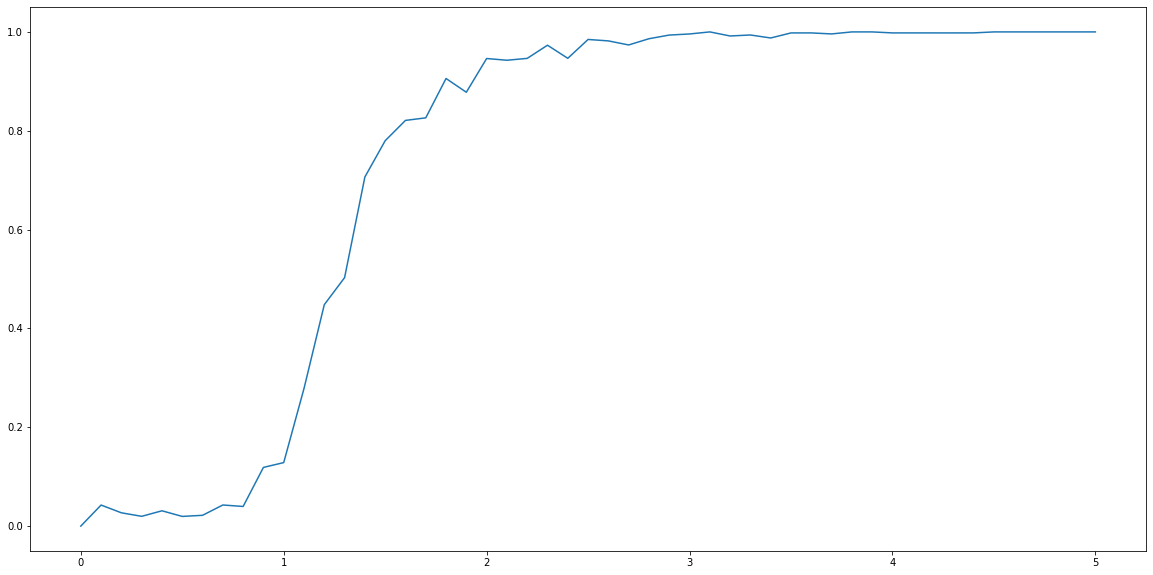

In [ ]:
plt.figure(figsize=(20,10))

sns.lineplot(x=dicto.keys(),y=dicto.values())